# This is a demo of how load to MNIST raw pngs manually without torchvision and use CrysX for neural network machine learning

## Run the following for Google colab 
then restart runtime

In [ ]:
! pip install --upgrade --no-cache-dir https://github.com/manassharma07/crysx_nn/tarball/main
! pip install IPython==7.7.0

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from crysx_nn import mnist_utils as mu
import numpy as np

## Download MNIST_orig and MNIST_orig dataset  (May take upto 5 min)

In [5]:
%%time
mu.downloadMNIST()

Wall time: 44.1 s


## Load the training dataset from MNIST_orig in memory (May take upto 5 min)

In [2]:
%%time
path = 'MNIST-PLUS-PNG/mnist_orig_png'
trainData, trainLabels = mu.loadMNIST(path_main=path, train=True, shuffle=True)

Wall time: 3min 47s


In [3]:
print('Training data shape', trainData.shape)
print('Training labels shape',trainLabels.shape)
print('Size of training data in memory (GB)', trainData.nbytes/1024/1024/1024)

Training data shape (60000, 28, 28)
Training labels shape (60000, 1)
Size of training data in memory (GB) 0.3504753112792969


In [4]:
# Statistics
print(trainData.min()) # Expected for MNIST_orig: 0.0
print(trainData.max()) # Expected for MNIST_orig: 255.
print(trainData.mean()) # Expected for MNIST_orig: 33.31842144
print(trainData.std()) # Expected for MNIST_orig: 78.567489983

0.0
255.0
33.318421449829934
78.56748998339809


## Normalize within the range [0,1.0]

In [5]:
trainData = trainData/255 # Normalize
# Statistics
print(trainData.min()) # Expected for MNIST_orig: 0.0
print(trainData.max()) # Expected for MNIST_orig: 1.0
print(trainData.mean()) # Expected for MNIST_orig: 0.1306604762738426
print(trainData.std()) # Expected for MNIST_orig: 0.3081078038564622 

trainData_mean = trainData.mean()
trainData_std = trainData.std()


0.0
1.0
0.13066047627384247
0.30810780385646247


## Standardize the data so that it has mean 0 and variance 1

In [6]:
trainData = (trainData - np.mean(trainData)) / np.std(trainData)
# Statistics
print(trainData.min()) # Expected for MNIST_orig: -0.42407
print(trainData.max()) # Expected for MNIST_orig: 2.8215433
print(trainData.mean()) # Expected for MNIST_orig: 0.0
print(trainData.std()) # Expected for MNIST_orig: 1.0000

-0.42407389439156495
2.821543345689338
1.2095938763084223e-15
1.0000000000000016


## Convert labels to one-hot vectors

In [7]:
print(trainLabels)
trainLabels = mu.one_hot_encode(trainLabels, 10)
print(trainLabels)

[[3.]
 [8.]
 [2.]
 ...
 [8.]
 [5.]
 [0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


## Flatten the input numpy arrays (nSamples,28,28)->(nSamples, 784)

In [8]:
trainData = trainData.reshape(trainData.shape[0], 784)

## Let us create a NN using CrysX-NN now

In [9]:
nInputs = 784 # No. of nodes in the input layer
neurons_per_layer = [256, 10] # Neurons per layer (excluding the input layer)
activation_func_names = ['ReLU', 'Softmax']
nLayers = len(neurons_per_layer)
nEpochs = 9
batchSize = 200 # No. of input samples to process at a time for optimization

In [10]:
from crysx_nn import network
model = network.nn_model(nInputs=nInputs, neurons_per_layer=neurons_per_layer, activation_func_names=activation_func_names, batch_size=batchSize, device='CPU', init_method='Xavier') 

model.lr = 0.3

C:\Users\manas\anaconda3\envs\crysx_nn\lib\site-packages\crysx_nn\network.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Note: The model will use the following device for all the computations:  CPU


## Check the model details

In [11]:
model.details()

----------------------------------------------------------------------------------
****Neural Network Model Details****
----------------------------------------------------------------------------------
Number of input nodes:  784
Number of layers (hidden+output):  2
Number of nodes in each layer (hidden & output):  [256, 10]
Activation function for each layer (hidden & output):   ['ReLU', 'Softmax']
Method used for weights and biases initialization:   Xavier
Batch Size:  200
Device:  CPU
Optimization method:  SGD
Learning rate:  0.3
----------------------------------------------------------------------------------


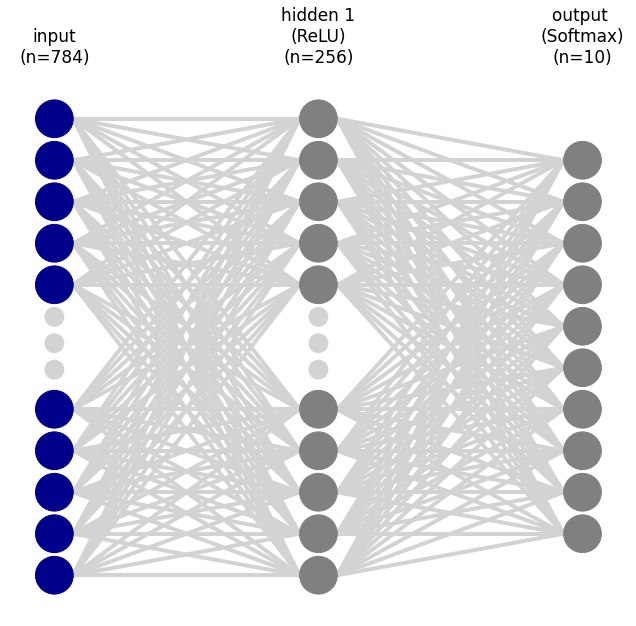

In [12]:
model.visualize()

## Optimize/Train the network

In [13]:
inputs = trainData.astype(np.float32)
outputs = trainLabels.astype(np.float32)
# Run optimization
# model.optimize(inputs, outputs, lr=0.4,nEpochs=nEpochs,loss_func_name='BCE', miniterEpoch=1, batchProgressBar=True, miniterBatch=100)
# To get accuracies at each epoch
model.optimize(inputs, outputs, lr=0.3,nEpochs=nEpochs,loss_func_name='CCE', miniterEpoch=1, batchProgressBar=True, miniterBatch=100, get_accuracy=True)


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.2714240100683675


  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

## Error at each epoch

In [14]:
print(model.errors)

[0.2714240100683675, 0.10455370277983154, 0.07128880985227846, 0.052411116081055406, 0.039920266800744925, 0.030699158383483045, 0.02370523278734764, 0.018533722618931655, 0.014579082847729111]


## Accuracy at each epoch

In [15]:
print(model.accuracy)

[0.9165333333333333, 0.9692833333333347, 0.9797666666666693, 0.9859333333333361, 0.9898500000000033, 0.992700000000003, 0.994966666666669, 0.9969500000000014, 0.9979500000000009]


## Save model weights and biases

In [16]:
# Save weights
model.save_model_weights('NN_crysx_mnist_98.11_weights')
# Save biases
model.save_model_biases('NN_crysx_mnist_98.11_biases')

## Load model weights and biases from files

In [17]:
model.load_model_weights('NN_crysx_mnist_98.11_weights')
model.load_model_biases('NN_crysx_mnist_98.11_biases')

In [18]:
from crysx_nn import loss
### Baseline: just say it's anything at probability 1/N, what's the loss?
N = 10
labels = np.zeros((1, 10), dtype=np.float32)
labels[0, 3] = 1.
output = np.full_like(labels, 1./N)
print(loss.BCE_loss(output, labels))

0.32508277339150504


## Test data set

In [19]:
path = 'MNIST-PLUS-PNG/mnist_orig_png'
testData, testLabels = mu.loadMNIST(path_main=path, train=False, shuffle=True)

print('Test data shape', testData.shape)
print('Test labels shape',testLabels.shape)
print('Size of training data in memory (GB)', testData.nbytes/1024/1024/1024)

# Statistics
print(testData.min()) # Expected for MNIST_orig: 0.0
print(testData.max()) # Expected for MNIST_orig: 255.
print(testData.mean()) # Expected for MNIST_orig: 33.31842144
print(testData.std()) # Expected for MNIST_orig: 78.567489983

## Normalize within the range [0,1.0]

testData = testData/255. # Normalize
# Statistics
print(testData.min()) # Expected for MNIST_orig: 0.0
print(testData.max()) # Expected for MNIST_orig: 1.0
print(testData.mean()) # Expected for MNIST_orig: 0.1306604762738426
print(testData.std()) # Expected for MNIST_orig: 0.3081078038564622 

## Standardize the data so that it has mean 0 and variance 1
# Use the mean and std of training data **********
testData = (testData - trainData_mean) / trainData_std
# Statistics
print(testData.min()) # Expected for MNIST_orig: -0.42407
print(testData.max()) # Expected for MNIST_orig: 2.8215433
print(testData.mean()) # Expected for MNIST_orig: 0.0
print(testData.std()) # Expected for MNIST_orig: 1.0000

## Convert labels to one-hot vectors
print(testLabels)
testLabels = mu.one_hot_encode(testLabels, 10)
print(testLabels)

## Flatten the input numpy arrays (nSamples,28,28)->(nSamples, 784)
testData = testData.reshape(testData.shape[0], 784)
print(testData.shape)


Test data shape (10000, 28, 28)
Test labels shape (10000, 1)
Size of training data in memory (GB) 0.05841255187988281
0.0
255.0
33.791224489795916
79.17246322228638
0.0
1.0
0.13251460584233676
0.310480247930535
-0.42407389439156495
2.821543345689338
0.0060177948928493135
1.0077000453879377
[[5.]
 [1.]
 [8.]
 ...
 [7.]
 [2.]
 [8.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(10000, 784)


## Performance on Test data

In [20]:
## Convert to float32 arrays
inputs = testData.astype(np.float32)
outputs = testLabels.astype(np.float32)
predictions, error = model.predict(inputs, outputs, loss_func_name='CCE')
print('Error:',error)
# print(predictions)
predictions, error, accuracy = model.predict(inputs, outputs, loss_func_name='CCE', get_accuracy=True)
print('Error:',error)
print('Accuracy %:',accuracy*100)

Error: 0.06371906282487613
Error: 0.06371906282487613
Accuracy %: 98.06


## Confusion matrix

Confusion matrix:
 [[9.720e+02 0.000e+00 1.000e+00 0.000e+00 1.000e+00 0.000e+00 3.000e+00
  1.000e+00 1.000e+00 1.000e+00]
 [0.000e+00 1.127e+03 3.000e+00 2.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 2.000e+00 0.000e+00]
 [4.000e+00 1.000e+00 1.005e+03 3.000e+00 3.000e+00 0.000e+00 1.000e+00
  8.000e+00 6.000e+00 1.000e+00]
 [0.000e+00 0.000e+00 4.000e+00 9.870e+02 0.000e+00 5.000e+00 0.000e+00
  5.000e+00 3.000e+00 6.000e+00]
 [1.000e+00 0.000e+00 2.000e+00 0.000e+00 9.690e+02 0.000e+00 3.000e+00
  1.000e+00 1.000e+00 5.000e+00]
 [2.000e+00 0.000e+00 0.000e+00 4.000e+00 2.000e+00 8.750e+02 4.000e+00
  1.000e+00 3.000e+00 1.000e+00]
 [4.000e+00 3.000e+00 1.000e+00 1.000e+00 9.000e+00 3.000e+00 9.350e+02
  0.000e+00 2.000e+00 0.000e+00]
 [2.000e+00 2.000e+00 9.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
  1.006e+03 2.000e+00 6.000e+00]
 [4.000e+00 1.000e+00 2.000e+00 2.000e+00 3.000e+00 3.000e+00 2.000e+00
  3.000e+00 9.500e+02 4.000e+00]
 [3.000e+00 2.000e+00 0.000e+00 3.00

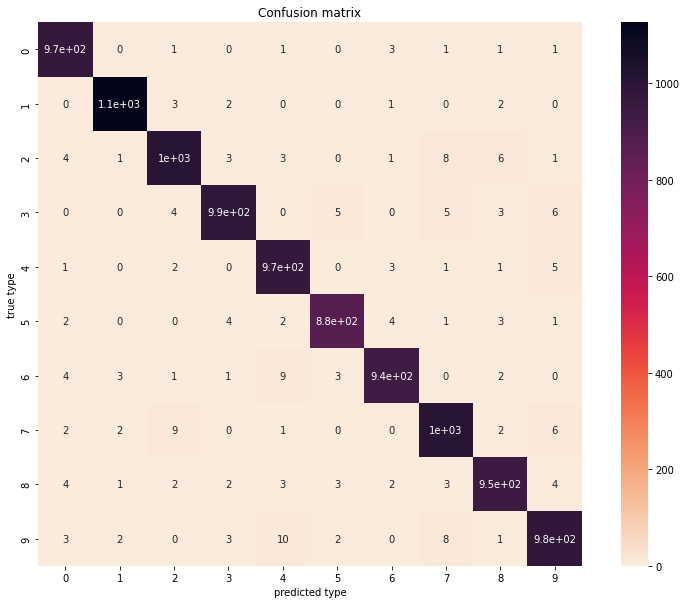

In [21]:
from crysx_nn import utils

# Get the indices of the maximum probabilities for each sample in the predictions array
pred_digit = np.argmax(predictions, axis=1)
# Get the digit index from the one-hot encoded array
true_digit = np.argmax(testLabels, axis=1)
# Calculation confusion matrix
cm = utils.compute_confusion_matrix(pred_digit, true_digit)
print('Confusion matrix:\n',cm)

# Plot the confusion matrix
utils.plot_confusion_matrix(cm)

## Interactive test

In [22]:
from PIL import ImageTk, Image, ImageDraw
import PIL
from tkinter import *
import cv2

width = 200  # canvas width
height = 200 # canvas height
center = height//2
white = (255, 255, 255) # canvas back

def save():
    # save image to hard drive
    filename = "user_input.jpg"
    global output_image 
    output_image.save(filename)
    ###### Centering begin
    # Load image as grayscale and obtain bounding box coordinates
    image = cv2.imread('user_input.jpg', 0)
#     print(image)
    height, width = image.shape
    x,y,w,h = cv2.boundingRect(image)

    # Create new blank image and shift ROI to new coordinates
    ROI = image[y:y+h, x:x+w]
    mask = np.zeros([ROI.shape[0]+10,ROI.shape[1]+10])
    width, height = mask.shape
#     print(ROI.shape)
#     print(mask.shape)
    x = width//2 - ROI.shape[0]//2 
    y = height//2 - ROI.shape[1]//2 
#     print(x,y)
    mask[y:y+h, x:x+w] = ROI
#     print(mask)
    # Check if centering/masking was successful
#     plt.imshow(mask, cmap='viridis') 
    output_image = PIL.Image.fromarray(mask) # mask has values in [0-255] as expected
# Now we need to resize, but it causes problems with default arguments as it changes the range of pixel values to be negative or positive
    # compressed_output_image = output_image.resize((22,22))
    # Therefore, we use the following:
    compressed_output_image = output_image.resize((22,22), PIL.Image.BILINEAR) # PIL.Image.NEAREST or PIL.Image.BILINEAR also performs good

#     # Enhance Saturation
#     converter = PIL.ImageEnhance.Color(compressed_output_image)
#     compressed_output_image = converter.enhance(2.5)
    # Enhance contrast
#     converter = PIL.ImageEnhance.Contrast(compressed_output_image)
#     compressed_output_image = converter.enhance(3.5)
    # normalize in the range 0-1
    tensor_image = np.array(compressed_output_image.getdata())/255.
    tensor_image = tensor_image.reshape(22,22)
    # Padding
    tensor_image = np.pad(tensor_image, (3,3), "constant", constant_values=(0,0))
    # Normalization should be done after padding i guess
    print(np.mean(trainData))
    tensor_image = (tensor_image - trainData_mean) / trainData_std
    plt.imshow(tensor_image.reshape(28,28), cmap='viridis')
    # Debugging
#     print(tensor_image)
#     print(np.array(compressed_output_image.getdata())) # Get data values)
#     print(np.array(image.getdata()))

    ### Compute the predictions
    output0 = model.predict(tensor_image.reshape(1,784))
    print('Probabilities for all the digits:')
    print(output0)
    output = np.argmax(output0)
    print('Prediction')
    print(output)
    print('Top 3 predictions')
    print(output0[0].argsort()[-3:][::-1])
    print('Their probabilities (%)')
    ind = output0[0].argsort()[-3:][::-1]
    print(output0[0,ind]*100)

def paint(event):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
#     canvas.create_oval(x1, y1, x2, y2, fill="white",width=24)
    canvas.create_rectangle(x1, y1, x2, y2, fill="white",width=12)
    draw.line([x1, y1, x2, y2],fill="white",width=4)

master = Tk()

# create a tkinter canvas to draw on
canvas = Canvas(master, width=width, height=height, bg='white')
canvas.pack()

# create an empty PIL image and draw object to draw on
output_image = PIL.Image.new("L", (width, height), 0)
draw = ImageDraw.Draw(output_image)
canvas.pack(expand=YES, fill=BOTH)
canvas.bind("<B1-Motion>", paint)

# add a button to save the image
button=Button(text="save",command=save)
button.pack()

master.mainloop()

## Inference with 256 nodes; lr=0.4, 15 epochs:

Recognition of 1 is very problematic. It needs to be drawn very straight to be classified correctly. Otherwise it gets classified as 3 or 1. If 1 has the upper tilted line then it gets classified as 7. 1 with both the upper and bottom lines gets classified as 3.

Recognition of 7 is a big problem as it just gets classified as 1 or 2 most of the times. It needs to be drawn with very straight lines to be classified correctly. 7 with the cross line is also not very good at being recognized.

Sometimes 5 is problematic and gets classified as 3 or 1.

6 is also quite problematic and gets classified as 5 and 2.

Classification of 2, 3, 4, 8, and 9 are no problem.

## Inference with 256 nodes; lr=0.4, 10 epochs:

## Visualization of weights

**References:**

https://ml4a.github.io/ml4a/looking_inside_neural_nets/

https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html

https://medium.com/@jackgarbus/visualization-of-a-basic-neural-network-in-python-7f1d6770f00b

### Hidden layer 1 
The size of the weights for the first hidden layer is 256x784.
Therefore, we can visualize these as a 28x28 picture. 
We will have 256 such pictures, corresponding to each node in the hidden layer.


In [254]:
# Shape of weights and biases in the first hidden layer
print(model.weights[0].shape)
print(model.biases[0].shape)
weights_as_images_layer_1_orig =  (model.weights[0] + model.biases[0].reshape(model.neurons_per_layer[0],1))
print(weights_as_images_layer_1_orig.shape)
weights_as_images_layer_1 = weights_as_images_layer_1_orig.reshape(model.neurons_per_layer[0],28,28)
print(weights_as_images_layer_1.shape)

(256, 784)
(256,)
(256, 784)
(256, 28, 28)


### Plot some random nodes as examples

n_images:  25


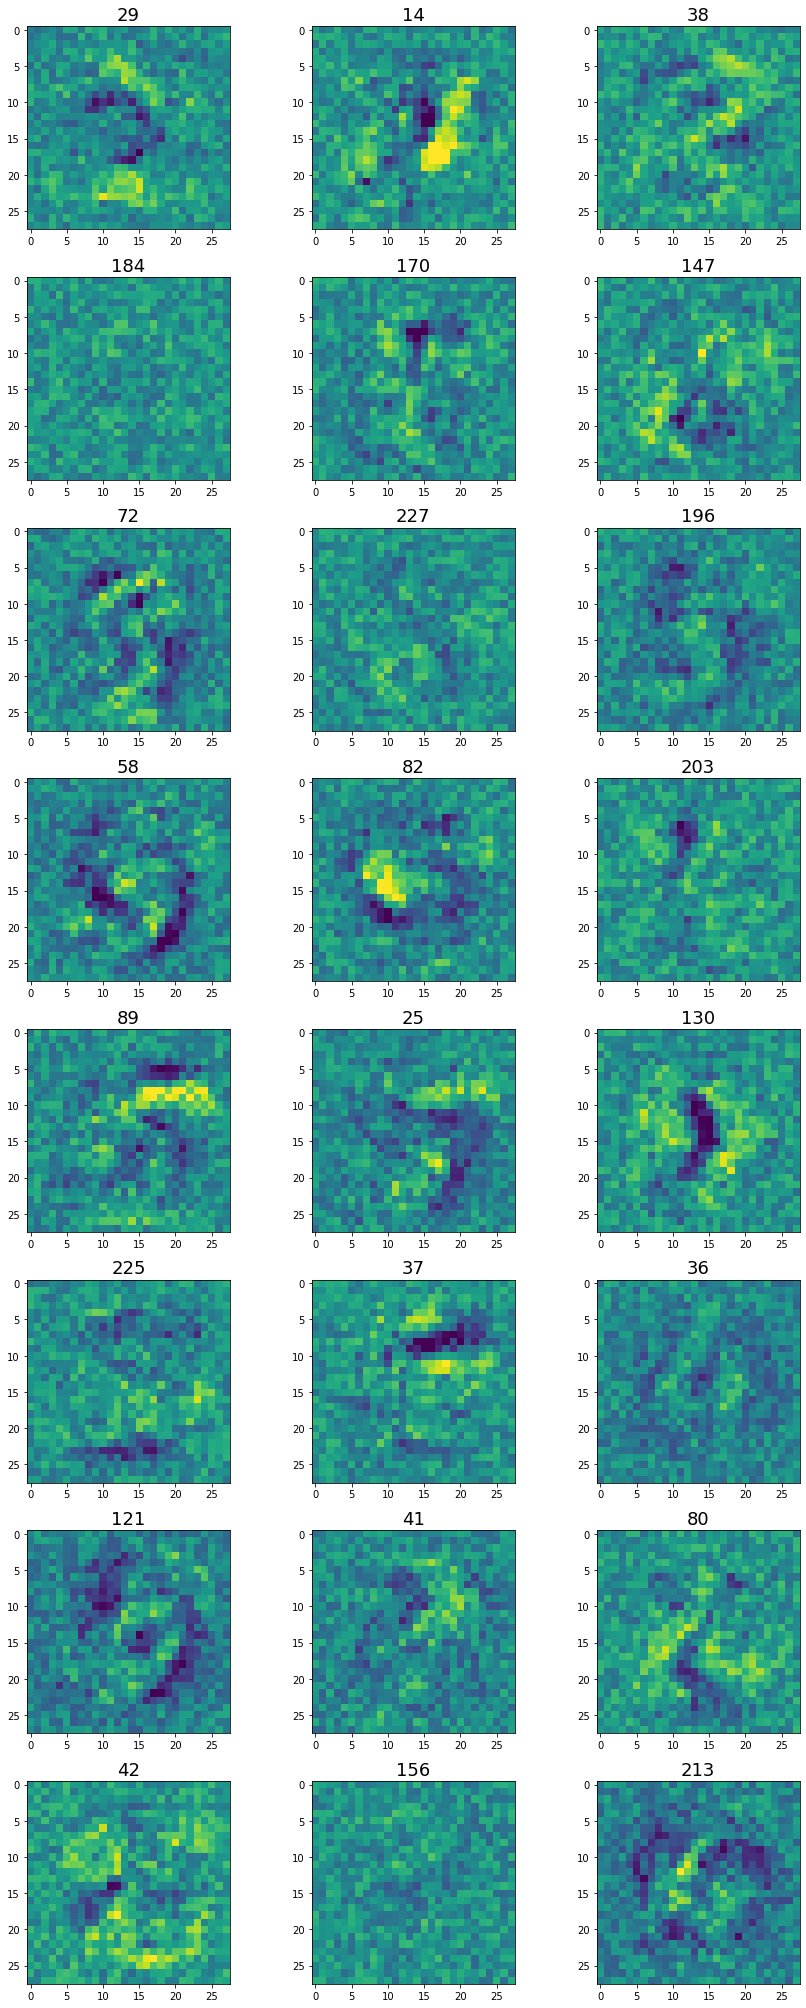

In [255]:
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = weights_as_images_layer_1.min(), weights_as_images_layer_1.max()


n_images = int(model.neurons_per_layer[0]/10)
print('n_images: ',n_images)
n_cols = 3
n_rows = (n_images + 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows,ncols=n_cols, figsize=(28,28))
for ax in axes.ravel():
    neuron_indx = np.random.randint(0, model.neurons_per_layer[0])
    ax.imshow(weights_as_images_layer_1[neuron_indx], cmap='viridis', vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_title(str(neuron_indx), fontsize=18)

fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
fig.subplots_adjust(wspace=-0.8)
plt.show()

### Final output layer

In [256]:
# Shape of weights and biases in the output layer
print(model.weights[1].shape)
print(model.biases[1].shape)
weights_as_images_layer_2_temp =  (model.weights[1] + model.biases[1].reshape(model.neurons_per_layer[1],1))

# Dot product the transpose image of this layer with the transposed image of previous layer
print(weights_as_images_layer_1_orig.shape)
print(weights_as_images_layer_2_temp.shape)
weights_as_images_layer_2_orig = np.dot(weights_as_images_layer_1_orig.T, weights_as_images_layer_2_temp.T).T

print(weights_as_images_layer_2_orig.shape)

# Reshape to get an image of 28x28
weights_as_images_layer_2 = weights_as_images_layer_2_orig.reshape(model.neurons_per_layer[1],28,28)
print(weights_as_images_layer_2.shape)

(10, 256)
(10,)
(256, 784)
(10, 256)
(10, 784)
(10, 28, 28)


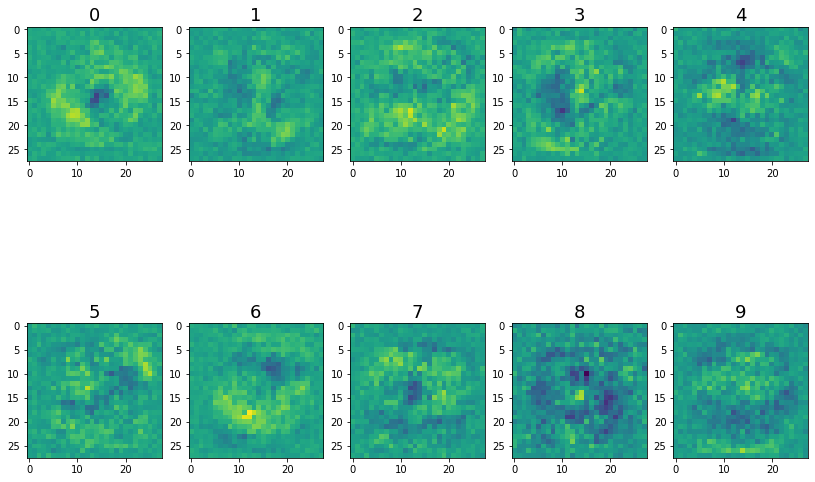

In [257]:
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = weights_as_images_layer_2.min(), weights_as_images_layer_2.max()

fig, axes = plt.subplots(nrows=2,ncols=5)
i = 0
for i, ax in enumerate(axes.ravel()):
#     ax.imshow(weights_as_images_layer_2[i], cmap='viridis')
    ax.imshow(weights_as_images_layer_2[i], cmap='viridis', vmin=vmin, vmax=vmax)
    ax.set_title(str(i), fontsize=18)


plt.show()

## This time with normalization

In [258]:
# Normalization
weights_as_images_layer_1_orig -= weights_as_images_layer_1_orig.min()
weights_as_images_layer_1_orig *= 255/weights_as_images_layer_1_orig.max()
weights_as_images_layer_1 = weights_as_images_layer_1_orig.reshape(model.neurons_per_layer[0],28,28)
print(weights_as_images_layer_1.shape)

(256, 28, 28)


In [259]:
# Normalization
weights_as_images_layer_2_orig -= weights_as_images_layer_2_orig.min()
weights_as_images_layer_2_orig *= 255/weights_as_images_layer_2_orig.max()
weights_as_images_layer_2 = weights_as_images_layer_2_orig.reshape(model.neurons_per_layer[1],28,28)
print(weights_as_images_layer_2.shape)

(10, 28, 28)


### Plot some random nodes as examples

n_images:  25


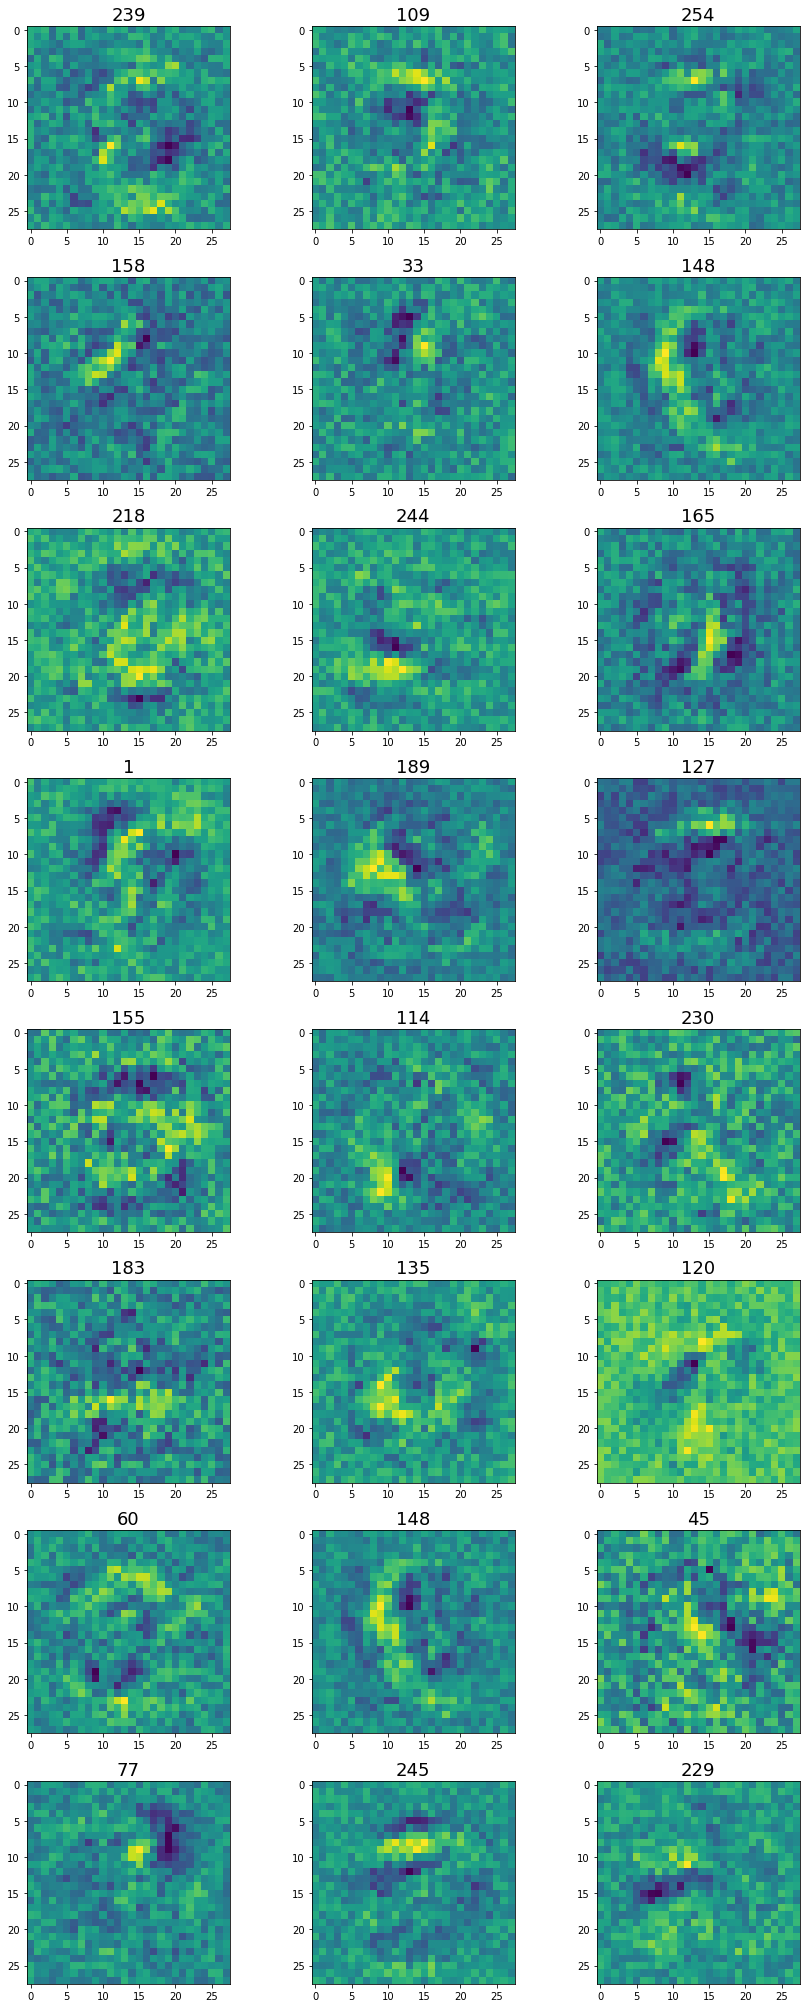

In [262]:
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = weights_as_images_layer_1.min(), weights_as_images_layer_1.max()


n_images = int(model.neurons_per_layer[0]/10)
print('n_images: ',n_images)
n_cols = 3
n_rows = (n_images + 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows,ncols=n_cols, figsize=(28,28))
for ax in axes.ravel():
    neuron_indx = np.random.randint(0, model.neurons_per_layer[0])
    ax.imshow(weights_as_images_layer_1[neuron_indx], cmap='viridis')
    ax.set_title(str(neuron_indx), fontsize=18)

fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
fig.subplots_adjust(wspace=-0.8)
plt.show()

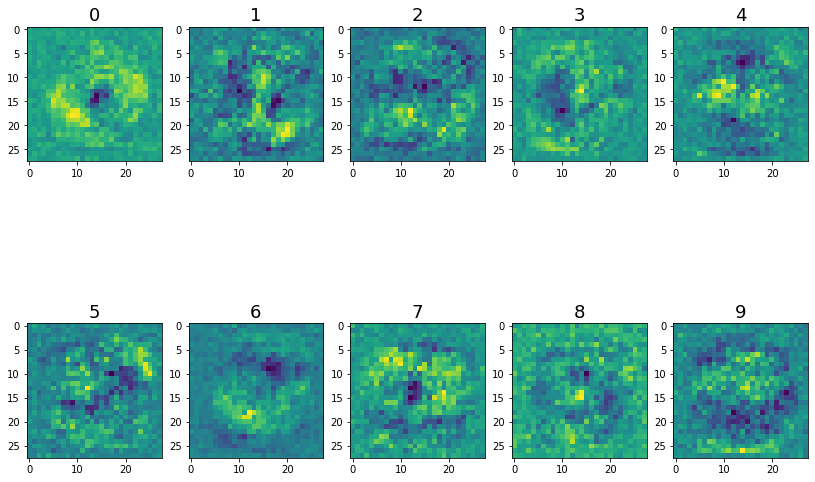

In [261]:


fig, axes = plt.subplots(nrows=2,ncols=5)
i = 0
for i, ax in enumerate(axes.ravel()):
    ax.imshow(weights_as_images_layer_2[i], cmap='viridis')
#     ax.imshow(weights_as_images_layer_2[i], cmap='viridis', vmin=vmin, vmax=vmax)
    ax.set_title(str(i), fontsize=18)


plt.show()